## <font color=purple> **NBL DATA FROM 2016/2017**
##### **Eric Nesi**
##### All Code in Python 3

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegressionCV, LogisticRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import GridSearchCV, cross_val_score


plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Part 1:
#### Discussion:
I figured I could use the counting stats for the year to set some X's, may come in handy after Part 3 as I really dive into the capstone, but wanted it in a csv, loaded into a notebook, and cleaned/grouped by team for the season.  I calculated effective field goal percentage which will be a good statistics to compare teams effective field goal percentage vs. Sydney's, compared to the rest of the year.  

In [3]:
#Load in different dataset. Counting stats for the year.
nbl_totals = pd.read_csv('/Users/ericnesi/Desktop/capstone_eric/datasets/NBL_Player_Data.csv')

In [4]:
nbl_totals.head()

,Player,Team,Games,Min,PTS,FGM,FGA,FG%,2PM,2PA,...,FTA,FT%,OR,DR,TR,AS,TO,ST,BL,PFS
0,Adam Doyle,Adelaide 36ers,21,134.90,44,15,38,39.5,11,22,...,13,76.9,2,9,11,17,12,4,0,12
1,Adam Gibson,Brisbane Bullets,21,613.76,206,70,153,45.8,37,73,...,35,94.3,11,43,54,79,33,21,4,60
2,Akil Mitchell,New Zealand Breakers,25,568.47,238,105,189,55.6,103,186,...,79,32.9,49,130,179,53,48,22,11,66
3,Aleks Maric,Sydney Kings,28,496.75,150,60,101,59.4,60,101,...,58,51.7,56,75,131,34,46,32,19,90
4,Alex Loughton,Cairns Taipans,26,455.83,172,66,145,45.5,41,84,...,21,71.4,23,54,77,32,17,11,3,49


In [5]:
#Make new Dataframe that is just team totals
totals_team = nbl_totals.copy()

In [6]:
totals_team.head()

,Player,Team,Games,Min,PTS,FGM,FGA,FG%,2PM,2PA,...,FTA,FT%,OR,DR,TR,AS,TO,ST,BL,PFS
0,Adam Doyle,Adelaide 36ers,21,134.90,44,15,38,39.5,11,22,...,13,76.9,2,9,11,17,12,4,0,12
1,Adam Gibson,Brisbane Bullets,21,613.76,206,70,153,45.8,37,73,...,35,94.3,11,43,54,79,33,21,4,60
2,Akil Mitchell,New Zealand Breakers,25,568.47,238,105,189,55.6,103,186,...,79,32.9,49,130,179,53,48,22,11,66
3,Aleks Maric,Sydney Kings,28,496.75,150,60,101,59.4,60,101,...,58,51.7,56,75,131,34,46,32,19,90
4,Alex Loughton,Cairns Taipans,26,455.83,172,66,145,45.5,41,84,...,21,71.4,23,54,77,32,17,11,3,49


In [7]:
totals_team = totals_team.drop('Player', axis=1)

In [8]:
totals_team.head(1)

,Team,Games,Min,PTS,FGM,FGA,FG%,2PM,2PA,2P%,...,FTA,FT%,OR,DR,TR,AS,TO,ST,BL,PFS
0,Adelaide 36ers,21,134.9,44,15,38,39.5,11,22,50.0,...,13,76.9,2,9,11,17,12,4,0,12


In [9]:
totals_team.columns

Index(['Team', 'Games', 'Min', 'PTS', 'FGM', 'FGA', 'FG%', '2PM', '2PA', '2P%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OR', 'DR', 'TR', 'AS', 'TO',
       'ST', 'BL', 'PFS'],
      dtype='object')

In [10]:
totals_team = totals_team.groupby('Team').agg({'Games': np.max,'Min': np.sum,'PTS': np.sum, 'FGM': np.sum, 
                                                 'FG%': np.mean,'FGA': np.sum, '2PM': np.sum, '2PA': np.sum,
                                                  '2P%': np.mean,'3PM': np.sum, '3PA': np.sum,'3P%': np.mean,
                                                 'FTM': np.sum, 'FTA': np.sum, 'FT%': np.mean, 'OR': np.sum, 
                                                 'DR': np.sum, 'TR': np.sum, 'AS': np.sum, 'TO': np.sum,
                                                  'ST': np.sum, 'BL': np.sum, 'PFS': np.sum}) 

In [11]:
totals_team.head(8)

,Games,Min,PTS,FGM,FG%,FGA,2PM,2PA,2P%,3PM,...,FTA,FT%,OR,DR,TR,AS,TO,ST,BL,PFS
Team,,,,,,,,,,,,,,,,,,,,,
Adelaide 36ers,31,6250.05,2867,1003,40.446154,2154,785,1540,42.646154,218,...,863,60.876923,363,827,1190,535,442,174,86,645
Brisbane Bullets,28,5649.68,2268,814,35.681250,1768,640,1279,39.025000,174,...,579,66.906250,294,638,932,423,430,145,81,650
Cairns Taipans,30,6034.22,2440,847,34.420000,1955,574,1195,37.740000,273,...,603,63.180000,281,651,932,513,368,190,61,621
Illawarra Hawks,34,6825.15,3010,1053,43.407692,2353,742,1472,44.800000,311,...,779,76.207692,344,773,1117,667,453,287,119,724
Melbourne United,28,5610.32,2345,851,40.575000,1941,585,1173,44.112500,266,...,528,60.018750,276,673,949,422,288,168,78,553
New Zealand Breakers,28,5642.27,2353,852,40.152941,1859,597,1187,42.435294,255,...,572,65.017647,304,757,1061,499,445,161,92,642
Perth Wildcats,33,6699.64,2732,977,39.952941,2223,739,1515,42.894118,238,...,739,53.894118,392,772,1164,550,427,225,104,697
Sydney Kings,28,5599.99,2295,808,37.423529,1856,577,1159,41.611765,231,...,579,58.135294,272,628,900,473,323,214,111,598


In [12]:
#Effective Field Goal Percentage which includes 3pt being more than 2pt
totals_team['EFG%'] = (totals_team['FGM'] + (.5 * totals_team['3PM'])) / totals_team['FGA']

In [13]:
totals_team.head(8)

,Games,Min,PTS,FGM,FG%,FGA,2PM,2PA,2P%,3PM,...,FT%,OR,DR,TR,AS,TO,ST,BL,PFS,EFG%
Team,,,,,,,,,,,,,,,,,,,,,
Adelaide 36ers,31,6250.05,2867,1003,40.446154,2154,785,1540,42.646154,218,...,60.876923,363,827,1190,535,442,174,86,645,0.516249
Brisbane Bullets,28,5649.68,2268,814,35.681250,1768,640,1279,39.025000,174,...,66.906250,294,638,932,423,430,145,81,650,0.509615
Cairns Taipans,30,6034.22,2440,847,34.420000,1955,574,1195,37.740000,273,...,63.180000,281,651,932,513,368,190,61,621,0.503069
Illawarra Hawks,34,6825.15,3010,1053,43.407692,2353,742,1472,44.800000,311,...,76.207692,344,773,1117,667,453,287,119,724,0.513600
Melbourne United,28,5610.32,2345,851,40.575000,1941,585,1173,44.112500,266,...,60.018750,276,673,949,422,288,168,78,553,0.506955
New Zealand Breakers,28,5642.27,2353,852,40.152941,1859,597,1187,42.435294,255,...,65.017647,304,757,1061,499,445,161,92,642,0.526896
Perth Wildcats,33,6699.64,2732,977,39.952941,2223,739,1515,42.894118,238,...,53.894118,392,772,1164,550,427,225,104,697,0.493027
Sydney Kings,28,5599.99,2295,808,37.423529,1856,577,1159,41.611765,231,...,58.135294,272,628,900,473,323,214,111,598,0.497575


In [14]:
total = totals_team['EFG%'].mean()
print(total)

0.5083733959521314


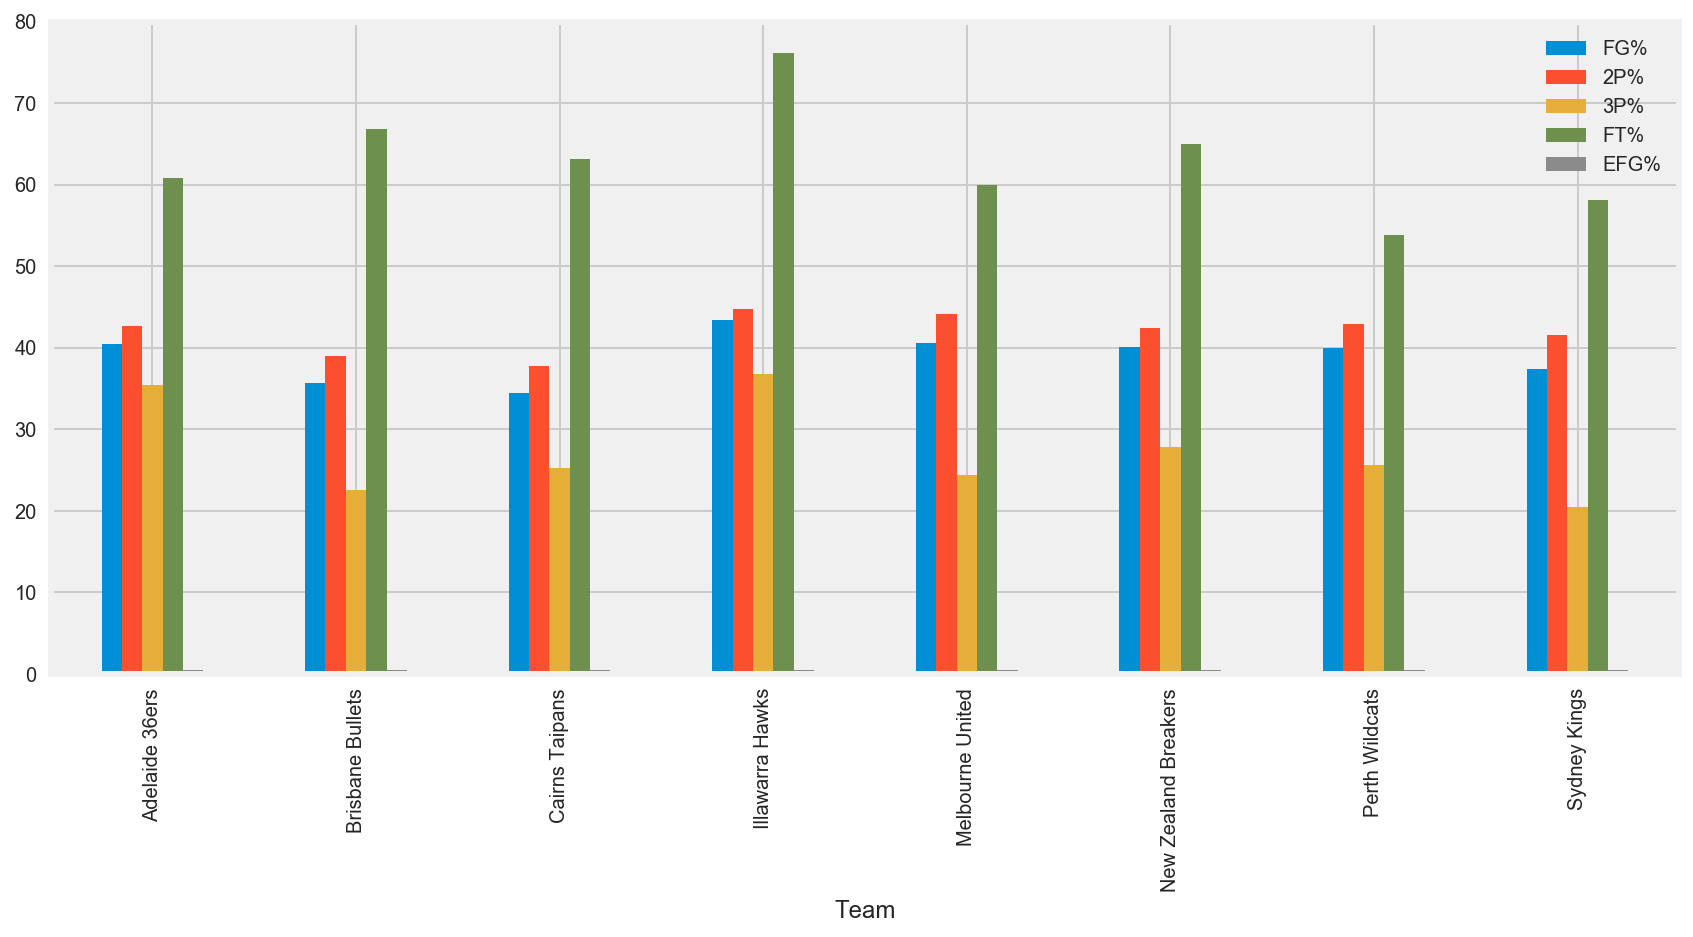

In [15]:
Percentages = totals_team[['FG%', '2P%', '3P%', 'FT%', 'EFG%']]
Percentages.plot.bar(figsize=(13, 6))

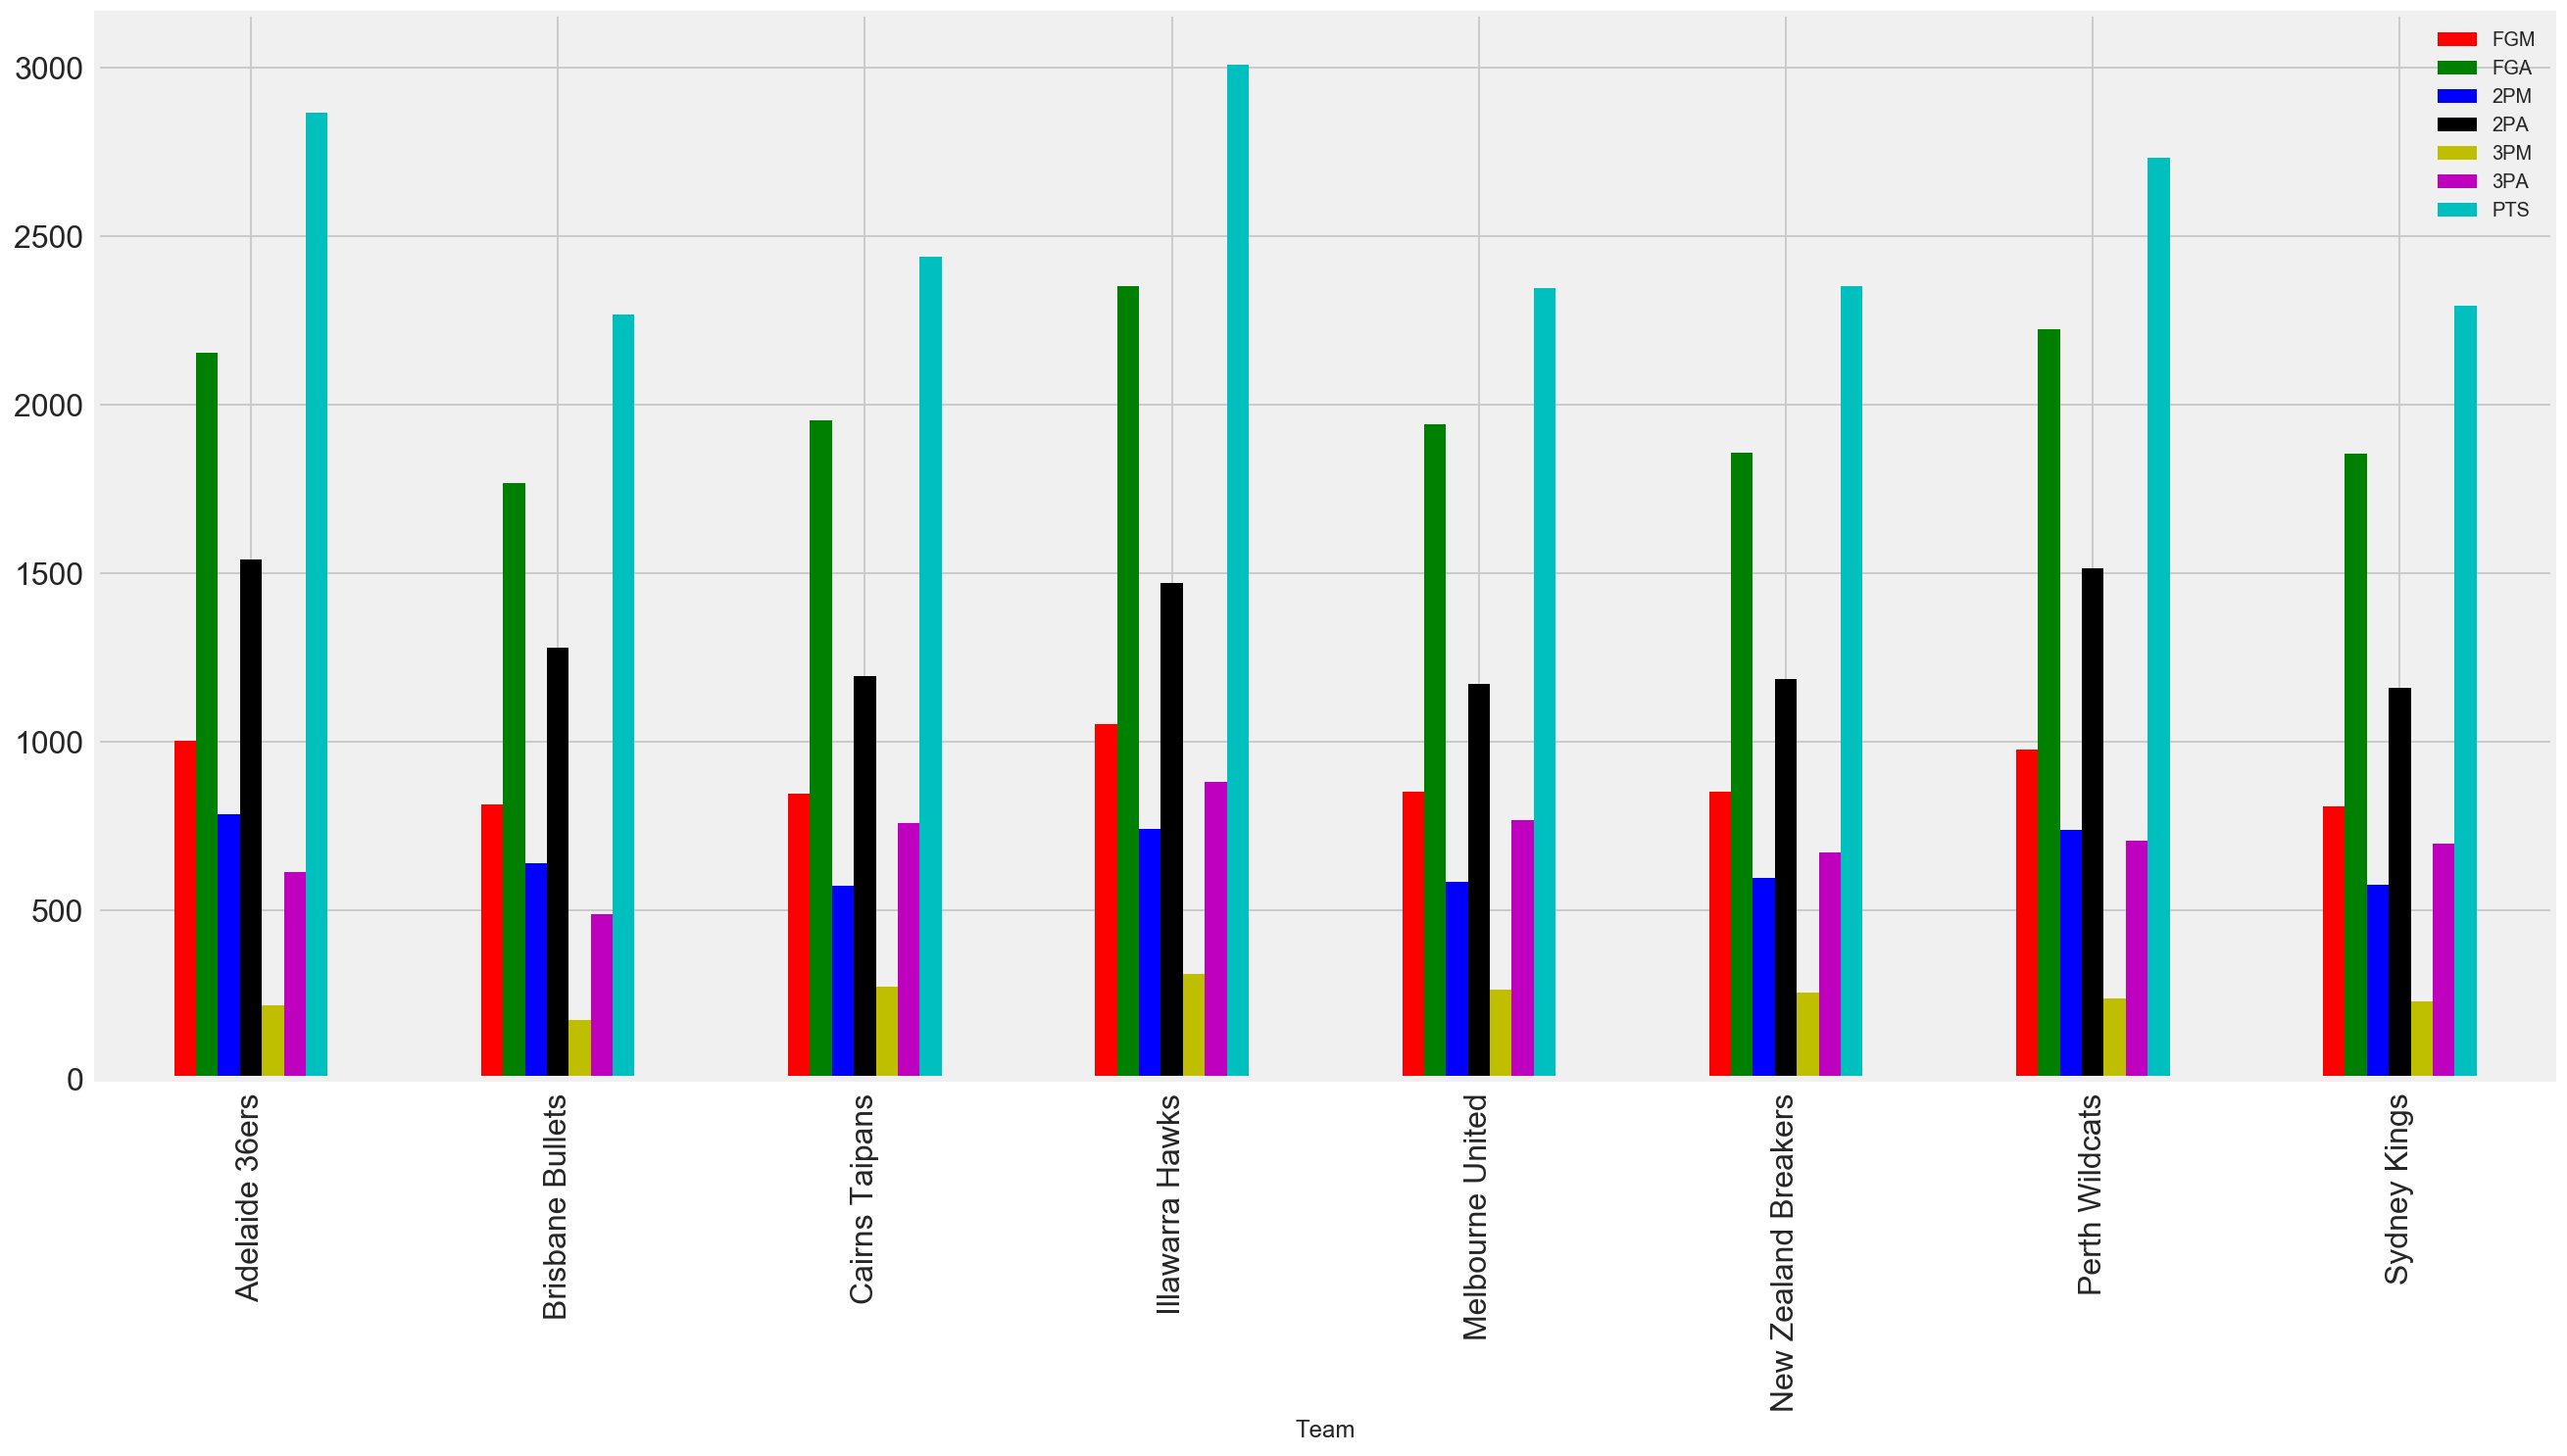

In [16]:
Counting_Stats = totals_team[['FGM', 'FGA', '2PM', '2PA', '3PM', '3PA', 'PTS']]
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
mycolors = 'rgbkymc' 
Counting_Stats.plot.bar(figsize=(20, 10), color = mycolors)

I wanted to create effective field goal percentage per team for the entire season.  Therefore, I could see if teams shot better or worse agains the Kings using this number.   I am debating potentially using as a threshhold for a classification regression based on this variable.  However, I can't really figure out how I want to tackle that yet.  That said, it seems like this data is good to have going forward so I went through and downloaded.  These basic stats allow me to calculate what are known as "Advanced Statistics" for the entire league.

### Part 2:
#### Discussion:
I am going to load my dataframe from Pt. 2 of capstone, which I exported to csv at the end of Pt. 2.  This is the dataframe with all my defensive shot data for the Kings. I will then set some 'X's', standardize them, look for correlation, run a regression model with result as my target. 

In [17]:
#read in CSV, maintain index, right now the data is sorted by distance. 
kings = pd.read_csv('/Users/ericnesi/Desktop/capstone_eric/datasets/kings_df.csv', index_col=[0])

In [18]:
kings.head()

,Team,teamScore,opponent,opponentScore,Player,PlayerNo,X,Y,ShotType,SubType,Result,Quarter,Season,League,W_L,3PM,distance,distance_m,Court_Loc
633,Perth Wildcats,93,Sydney Kings,80,C. Prather,10,5.5,50.0,2pt,dunk,1,1,2016-17 Regular Season,NBL,0,0,0.0,0.0,Restricted_Area
1743,Perth Wildcats,101,Sydney Kings,74,C. Prather,12,5.5,50.0,2pt,dunk,1,2,2016-17 Regular Season,NBL,0,0,0.0,0.0,Restricted_Area
1774,Perth Wildcats,101,Sydney Kings,74,J. McKay,5,5.5,50.0,2pt,dunk,1,4,2016-17 Regular Season,NBL,0,0,0.0,0.0,Restricted_Area
686,Perth Wildcats,93,Sydney Kings,80,J. McKay,4,5.5,50.0,2pt,dunk,1,4,2016-17 Regular Season,NBL,0,0,0.0,0.0,Restricted_Area
245,New Zealand Breakers,78,Sydney Kings,92,A. Mitchell,11,5.5,50.0,2pt,dunk,1,4,2016-17 Regular Season,NBL,1,0,0.0,0.0,Restricted_Area


In [19]:
kings.loc[kings['SubType']== 'three']

,Team,teamScore,opponent,opponentScore,Player,PlayerNo,X,Y,ShotType,SubType,Result,Quarter,Season,League,W_L,3PM,distance,distance_m,Court_Loc
896,Illawarra Hawks,93,Sydney Kings,99,M. Harris,10,9.472,7.143,3pt,three,0,1,2016-17 Regular Season,NBL,1,0,43.040670,6.524044,Right_Corner_3pt
1398,New Zealand Breakers,92,Sydney Kings,74,K. Dillard,8,21.129,15.646,3pt,three,0,1,2016-17 Regular Season,NBL,0,0,37.742058,6.760537,Right_Wing_3pt
1778,Perth Wildcats,101,Sydney Kings,74,M. Bragg,9,4.189,4.762,3pt,three,0,4,2016-17 Regular Season,NBL,0,0,45.256992,6.795622,Right_Corner_3pt
938,Illawarra Hawks,93,Sydney Kings,99,T. Coenraad,9,4.918,95.918,3pt,three,0,3,2016-17 Regular Season,NBL,1,0,45.921688,6.889628,Left_Corner_3pt
645,Perth Wildcats,93,Sydney Kings,80,D. Kernich-Drew,6,7.832,95.918,3pt,three,1,2,2016-17 Regular Season,NBL,0,1,45.977179,6.918581,Left_Corner_3pt
1766,Perth Wildcats,101,Sydney Kings,74,D. Martin,17,5.647,3.741,3pt,three,0,4,2016-17 Regular Season,NBL,0,0,46.259234,6.938972,Right_Corner_3pt
1744,Perth Wildcats,101,Sydney Kings,74,B. Cotton,1,5.282,3.741,3pt,three,1,2,2016-17 Regular Season,NBL,0,1,46.259514,6.939118,Right_Corner_3pt
1735,Perth Wildcats,101,Sydney Kings,74,B. Cotton,1,5.100,96.259,3pt,three,0,2,2016-17 Regular Season,NBL,0,0,46.260729,6.939754,Left_Corner_3pt
1754,Perth Wildcats,101,Sydney Kings,74,C. Prather,12,6.922,3.741,3pt,three,0,3,2016-17 Regular Season,NBL,0,0,46.280851,6.950264,Right_Corner_3pt
1750,Perth Wildcats,101,Sydney Kings,74,D. Martin,17,4.007,96.259,3pt,three,0,3,2016-17 Regular Season,NBL,0,0,46.283087,6.951431,Left_Corner_3pt


### Discussion:
I want to check to make sure my distances were calculated correctly.  When 2pts have distances from the hoop that are farter than three pointers, I got concerned.  I will plot based on ShotType 2pt, 3pt on the court diagram just to make sure.  

In [20]:
threes = kings.loc[kings['ShotType']== '3pt'].copy()
twos = kings.loc[kings['ShotType']== '2pt'].copy()

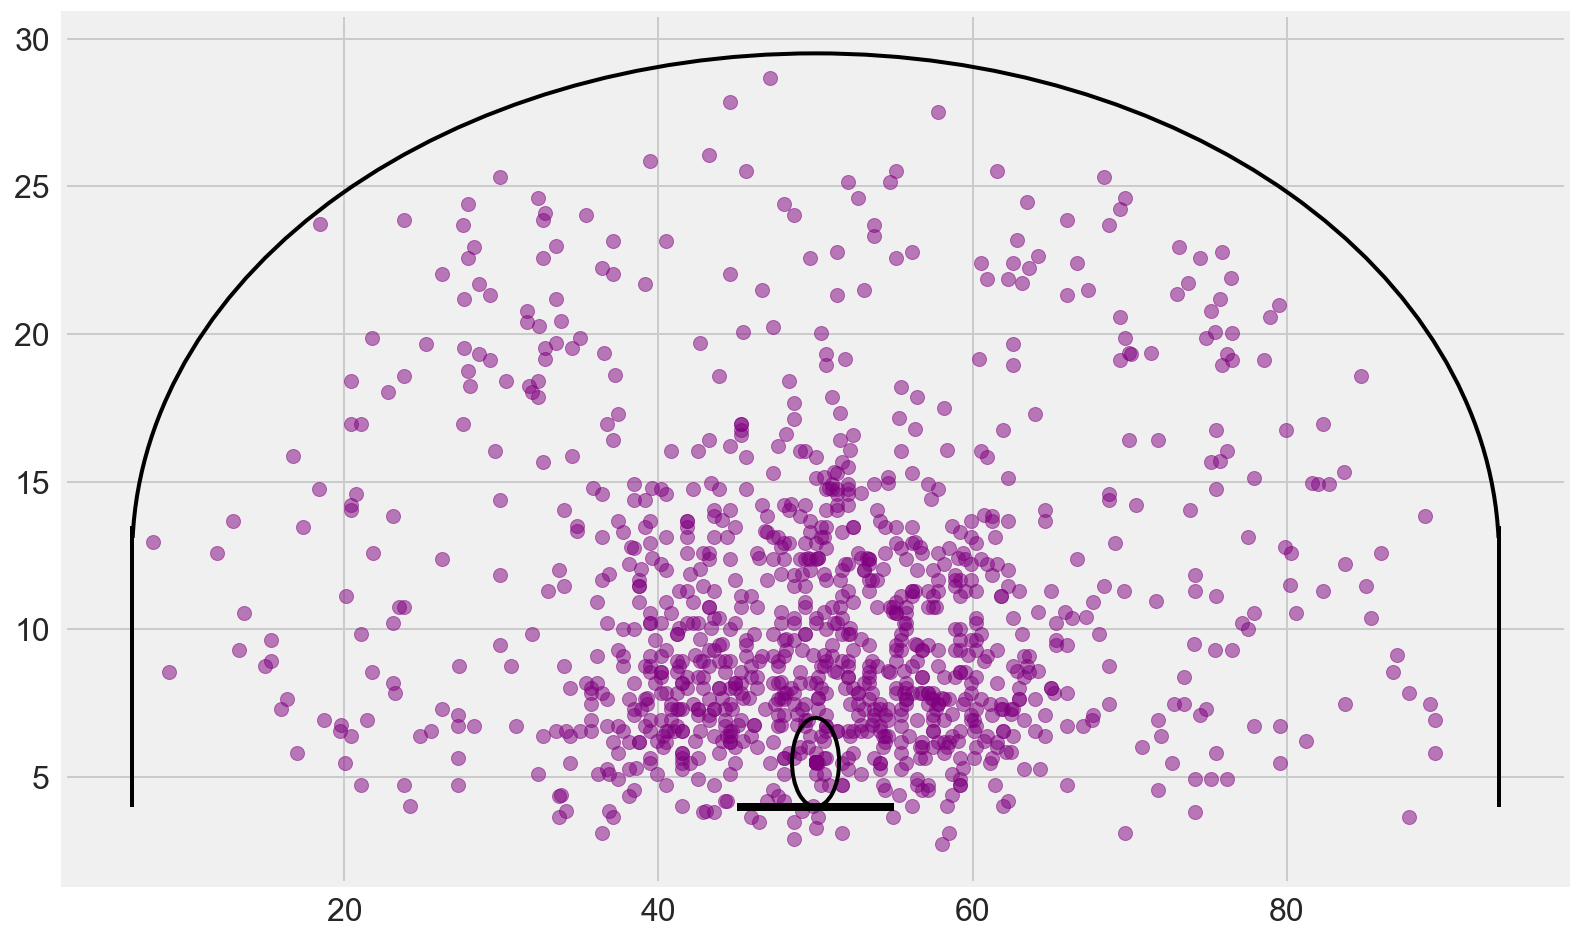

In [21]:
from matplotlib.patches import Circle, Rectangle, Arc
hoop = Circle((50, 5.5), radius=1.5, linewidth=2, color='black', fill=False)
backboard = Rectangle((45, 4), 10, 0, linewidth=4, color='black')
three_a = Rectangle((6.5, 4), 0, 9.5, linewidth=2, color='black')
three_b = Rectangle((93.5, 4), 0, 9.5, linewidth=2, color='black')
three_arc = Arc((50, 12.5), 87, 34, theta1=2, theta2=178, linewidth=2, color='black')

plt.figure(figsize=(12,8))
ax = plt.gca()
ax.add_patch(hoop)
ax.add_patch(backboard)
ax.add_patch(three_a)
ax.add_patch(three_b)
ax.add_patch(three_arc)
plt.scatter(twos.Y, twos.X, facecolors = 'purple', alpha = .5)
plt.show()

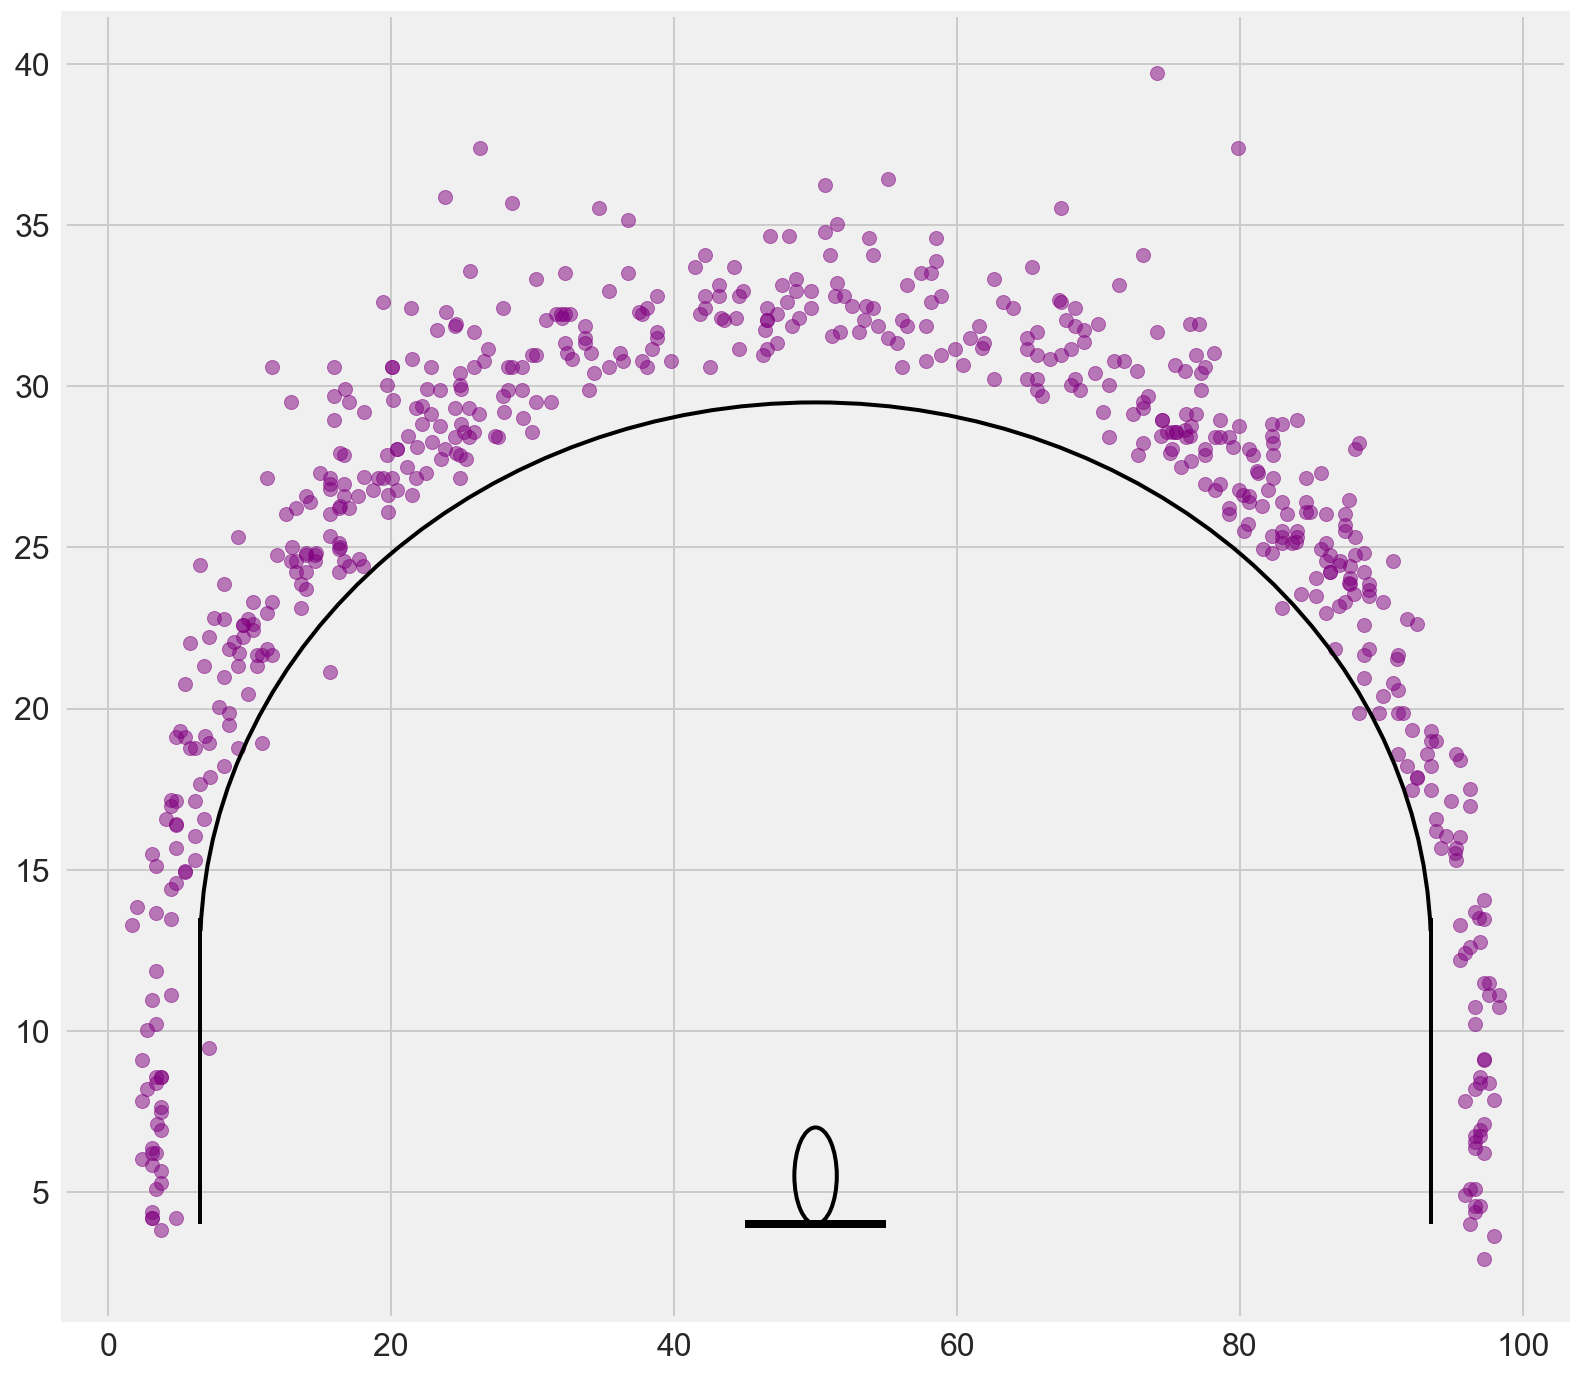

In [22]:
hoop = Circle((50, 5.5), radius=1.5, linewidth=2, color='black', fill=False)
backboard = Rectangle((45, 4), 10, 0, linewidth=4, color='black')
three_a = Rectangle((6.5, 4), 0, 9.5, linewidth=2, color='black')
three_b = Rectangle((93.5, 4), 0, 9.5, linewidth=2, color='black')
three_arc = Arc((50, 12.5), 87, 34, theta1=2, theta2=178, linewidth=2, color='black')

plt.figure(figsize=(12, 12))
ax = plt.gca()
ax.add_patch(hoop)
ax.add_patch(backboard)
ax.add_patch(three_a)
ax.add_patch(three_b)
ax.add_patch(three_arc)
plt.scatter(threes.Y, threes.X, facecolors = 'purple', alpha = .5)
plt.show()

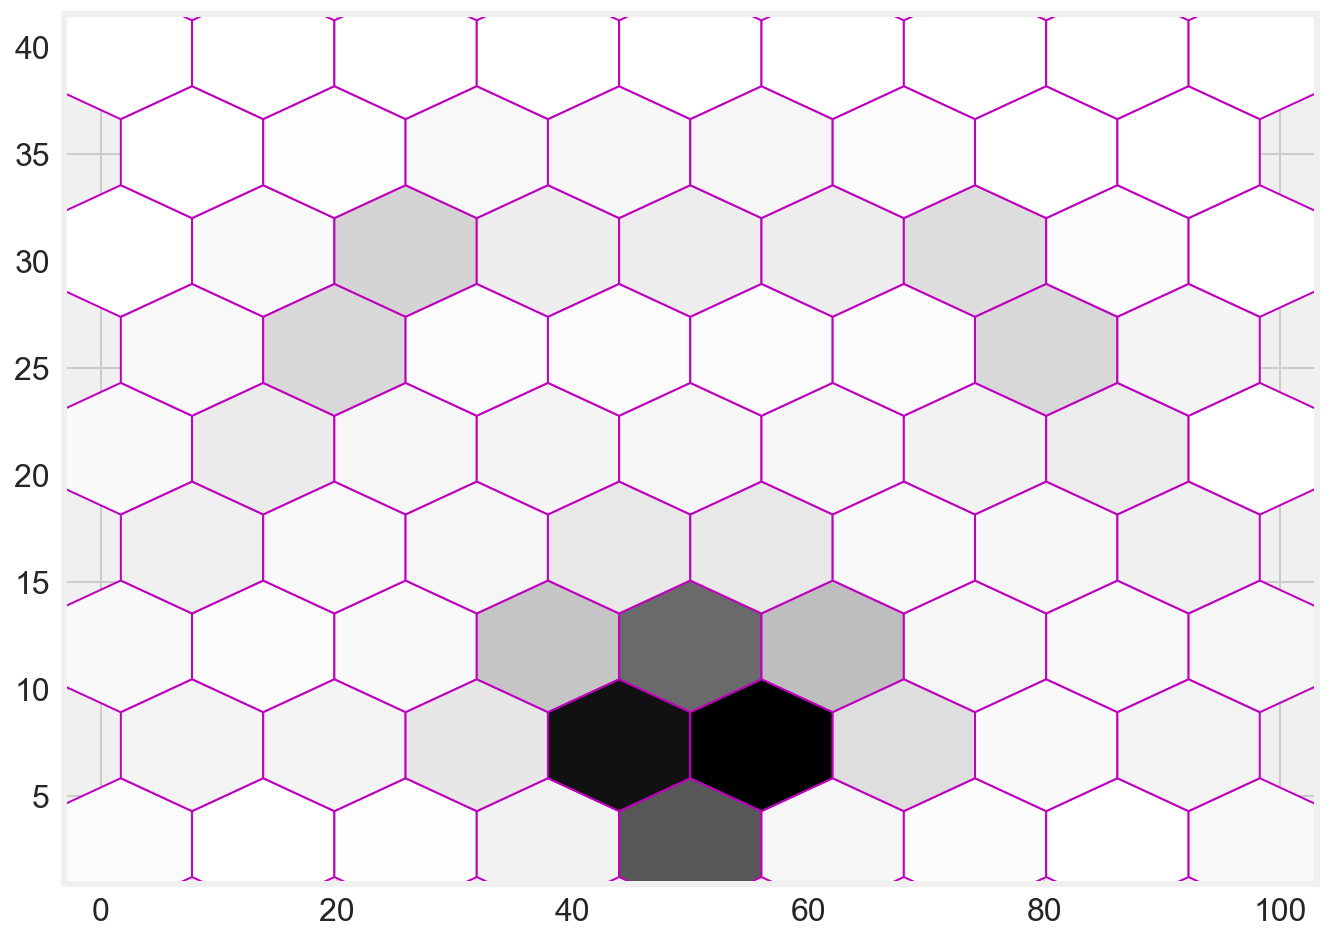

In [23]:
#Just testing this hexbin functionality through matplotlib
plt.figure(figsize=(10, 8))
hb_shot = plt.hexbin(kings.Y, kings.X, gridsize=8, color ='m')
plt.show()

#### Discussion:
Create X's based on ShotType, distance, Team, and new created column Bins. There are a couple of shots that are off but are close enough that we will keep them in the categories.  Until I have a solid way of accurately mapping the court to scale, I don't want to make changes.  

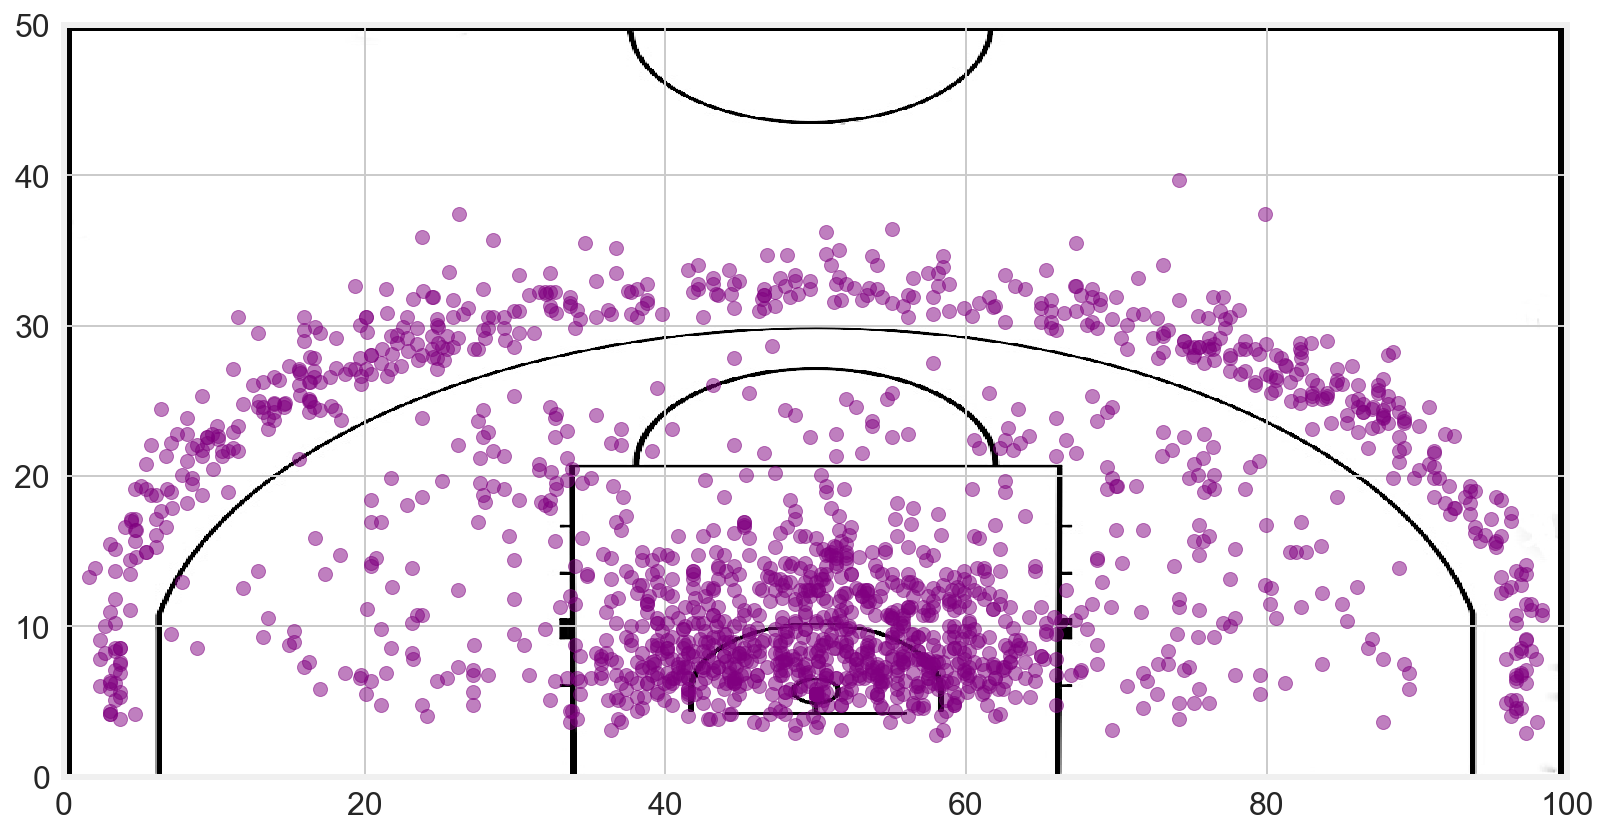

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
import matplotlib.cbook as cbook

plt.figure(figsize=(12,12))
ax = plt.gca()
datafile = cbook.get_sample_data('/Users/ericnesi/Desktop/capstone_eric/images/NBL_Court.jpg')
img = imread(datafile)
plt.imshow(img, zorder=0, extent=[0, 100, 0, 50])
plt.scatter(kings.Y, kings.X, facecolors = 'purple', alpha = .5)
plt.show()

In [ ]:
#Originally, I binned as following, but I refined this after I was able to calculate the correct distances from the hoop.
#As such, I removed the creation of these bins

hoop = Circle((50, 5.5), radius=1.5, linewidth=2, color='black', fill=False)
backboard = Rectangle((45, 4), 10, 0, linewidth=4, color='black')
three_a = Rectangle((6.5, 4), 0, 9.5, linewidth=2, color='black')
three_b = Rectangle((93.5, 4), 0, 9.5, linewidth=2, color='black')
three_arc = Arc((50, 12.5), 87, 34, theta1=2, theta2=178, linewidth=2, color='black')



plt.figure(figsize=(12,8))
ax = plt.gca()
ax.add_patch(hoop)
ax.add_patch(backboard)
ax.add_patch(three_a)
ax.add_patch(three_b)
ax.add_patch(three_arc)
plt.axvline(x=0)
plt.axvline(x=20)
plt.axvline(x=40)
plt.axvline(x=60)
plt.axvline(x=80)
plt.axvline(x=100)
plt.axhline(y=15)
plt.axhline(y=30)
plt.axhline(y=45)
plt.scatter(kings.Y, kings.X, facecolors = 'purple', alpha = .5)
plt.show()

In [24]:
kings.sort_values(['distance_m'], inplace=True, ascending=False) 
kings.head()

,Team,teamScore,opponent,opponentScore,Player,PlayerNo,X,Y,ShotType,SubType,Result,Quarter,Season,League,W_L,3PM,distance,distance_m,Court_Loc
882,Adelaide 36ers,91,Sydney Kings,85,D. Johnson,10,39.709,74.150,3pt,three,0,4,2016-17 Regular Season,NBL,0,0,41.874553,10.240632,Left_Wing_3pt
302,Illawarra Hawks,73,Sydney Kings,90,N. Kay,6,37.409,79.863,3pt,three,0,4,2016-17 Regular Season,NBL,1,0,43.703353,9.994555,Left_Wing_3pt
290,Illawarra Hawks,73,Sydney Kings,90,T. Coenraad,9,37.409,26.280,3pt,three,0,3,2016-17 Regular Season,NBL,1,0,39.759561,9.616913,Right_Wing_3pt
1047,Melbourne United,88,Sydney Kings,81,C. Goulding,13,35.883,23.810,3pt,three,1,2,2016-17 Regular Season,NBL,0,1,40.112876,9.370499,Right_Wing_3pt
1087,Melbourne United,88,Sydney Kings,81,C. Ware,10,30.601,11.565,3pt,three,0,4,2016-17 Regular Season,NBL,0,0,45.905440,9.090370,Right_Wing_3pt


In [25]:
#Set my X_features and append to dataframe
X_features = kings[['Court_Loc','Quarter']]
X_features = pd.concat([pd.get_dummies(X_features[col]) for col in X_features], axis=1)
X_features['distance_m'] = kings['distance_m']

In [26]:
X_features.head()

,In_the_Paint,Left_Corner,Left_Corner_3pt,Left_Wing,Left_Wing_3pt,Restricted_Area,Right_Corner,Right_Corner_3pt,Right_Wing,Right_Wing_3pt,Top_of_Key,Top_of_Key_3pt,1,2,3,4,distance_m
882,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,10.240632
302,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,9.994555
290,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,9.616913
1047,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,9.370499
1087,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,9.090370


#### **Random Forest:**

In [27]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

Xs = ss.fit_transform(X_features)

Y = kings['Result']

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Xtrain, Xtest, ytrain, ytest = train_test_split(Xs, Y, test_size=0.33)

dtc = DecisionTreeClassifier(max_depth=None, max_features='auto')
dtc.fit(Xtrain, ytrain)
print ('dtc acc:', dtc.score(Xtest, ytest))

rf = RandomForestClassifier(n_estimators=1000, max_depth=None, max_features='auto')
rf.fit(Xtrain, ytrain)
yhat = rf.predict(Xtest)
print ('rf acc:', accuracy_score(ytest, yhat))


dtc acc: 0.542517006803
rf acc: 0.544217687075


At this point, I realized predicting whether or not a shot is going to be made is potentially not a great option, but while I am doing it, I decided to try logistic regression to see if I could improve accuracy.  Not a great prediction score by RF/DTC.

#### **Logistic Regression:**

In [29]:
# Set parameters for gridsearching
# Taken from 6.3.3. and 6.3.4

gs_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.logspace(-5,0,100)
}

lr_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=5, verbose=1)
print (lr_gridsearch)


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'C': array([  1.00000e-05,   1.12332e-05, ...,   8.90215e-01,   1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)


In [30]:
# TTS our data.
# We will have a holdout set to test on at the end.
X_train, X_test, y_train, y_test = train_test_split(Xs, Y, test_size=0.3, random_state=12)

In [31]:
lr_gridsearch.fit(X_train, y_train)

print (lr_gridsearch.best_score_)
print (lr_gridsearch.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
0.626003210273
{'C': 0.0095454845666183372, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.6s finished


In [34]:
bestfit = {'C': 0.0095454845666183372, 'penalty':'l1', 'solver': 'liblinear'}

logreg = LogisticRegression(C=0.0095454845666183372, penalty='l1', solver='liblinear')

logreg.fit(X_train, y_train)

LogisticRegression(C=0.009545484566618337, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [35]:
Y_pred = logreg.predict(X_test)

# stores confusion matrix for Y Test and Y Pred  
conmat = confusion_matrix(y_test, Y_pred, labels=logreg.classes_)
# converts np.matrix format matrix to a dataframe and adds index and column names
conmat = pd.DataFrame(conmat, columns=logreg.classes_, index=logreg.classes_)

print ('best params for Result:')
print (conmat)

best params for Result:
     0   1
0  248  32
1  173  82


In [36]:
print(classification_report(y_test, Y_pred))

             precision    recall  f1-score   support

          0       0.59      0.89      0.71       280
          1       0.72      0.32      0.44       255

avg / total       0.65      0.62      0.58       535



In [37]:
best_lr = lr_gridsearch.best_estimator_

print (best_lr.score(Xs, Y))


0.623245367771


In [38]:
coef_df = pd.DataFrame({
        'coef':best_lr.coef_[0],
        'feature':X_features.columns
    })


coef_df['abs_coef'] = np.abs(coef_df.coef)

# sort by absolute value of coefficient (magnitude)
coef_df.sort_values('abs_coef', ascending=False, inplace=True)

coef_df.head(12)

,coef,feature,abs_coef
5,0.15422,Restricted_Area,0.15422
0,0.00000,In_the_Paint,0.00000
9,0.00000,Right_Wing_3pt,0.00000
15,0.00000,4,0.00000
14,0.00000,3,0.00000
13,0.00000,2,0.00000
12,0.00000,1,0.00000
11,0.00000,Top_of_Key_3pt,0.00000
10,0.00000,Top_of_Key,0.00000
8,0.00000,Right_Wing,0.00000


#### Discussion:
This is not surprising that the closer to the basket you are the more likely you are to make the shot. That said, the prediction score isn't great.  Furthermore, it is really not what I am trying to accomplish with the project.  I will explain more in Summary.

In [43]:
print(kings.shape)
print(kings.Court_Loc.unique())

(1781, 19)
['Left_Wing_3pt' 'Right_Wing_3pt' 'Top_of_Key_3pt' 'Left_Corner_3pt'
 'Right_Corner_3pt' 'Right_Wing' 'Top_of_Key' 'Left_Wing' 'Right_Corner'
 'Left_Corner' 'In_the_Paint' 'Restricted_Area']


In [45]:
print(np.sum(kings.Court_Loc =="Restricted_Area")/1781)
print(np.sum(kings.Court_Loc =='Left_Wing_3pt')/1781)
print(np.sum(kings.Court_Loc =='Right_Wing_3pt')/1781)
print(np.sum(kings.Court_Loc =='Top_of_Key_3pt')/1781)
print(np.sum(kings.Court_Loc =='Left_Corner_3pt')/1781)
print(np.sum(kings.Court_Loc =='Right_Corner_3pt')/1781)
print(np.sum(kings.Court_Loc =='Top_of_Key')/1781)
print(np.sum(kings.Court_Loc =='Left_Wing')/1781)
print(np.sum(kings.Court_Loc =='Right_Corner')/1781)
print(np.sum(kings.Court_Loc =='Left_Corner')/1781)
print(np.sum(kings.Court_Loc =='In_the_Paint')/1781)

0.212801796743
0.111173498035
0.115665356541
0.0606400898372
0.0151600224593
0.0157215047726
0.0224592925323
0.0359348680517
0.0230207748456
0.0252667040988
0.329028635598


## End Part3 Notebook